 What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

-> What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

K-Means partitions data into K predefined clusters by minimizing the distance between data points and their cluster centroids.

How it works

Choose the number of clusters K

Initialize centroids

Assign points to the nearest centroid

Update centroids

Repeat until convergence

Key Characteristics

Requires K to be specified in advance

Works best for large datasets

Assumes spherical, equally sized clusters

Sensitive to outliers and initial centroid selection

Use Case

Customer Segmentation in E-commerce

Group customers based on:

Purchase frequency

Spending behavior

Browsing patterns

Helps in targeted marketing and personalization

2. Hierarchical Clustering

Hierarchical clustering builds a tree-like structure (dendrogram) showing how clusters are merged or split at different levels.

Key Characteristics

Does not require K initially

Produces a visual dendrogram

Works well for small to medium datasets

Computationally expensive for large datasets

Less sensitive to initialization

Use Case

Gene Expression Analysis (Biomedical Data)

Identify natural groupings of genes or patients

Dendrogram helps researchers:

Understand biological relationships

Decide the number of clusters visually



Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.


->The Silhouette Score measures how well data points fit within their assigned cluster compared to other clusters.

It considers:

Cohesion → How close a point is to its own cluster

Separation → How far it is from other clusters

Silhouette Score Formula (Conceptual)

For a data point i:

a(i) = average distance to points in the same cluster

b(i) = average distance to points in the nearest other cluster

Silhouette Score

b(i)-a(i)/max(a(i),b(i))

Why Silhouette Score is Important

Evaluates clustering without labeled data

Helps select the optimal number of clusters (K)

Compares different clustering algorithms

Detects overlapping or poorly separated clusters



 What are the core parameters of DBSCAN, and how do they influence the
clustering process?

->DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm. Its behavior is mainly controlled by two core parameters, with one optional/helper parameter often discussed.

1. (Epsilon / eps)

The radius that defines the neighborhood around a data point.

How it influences clustering:

Two points are considered neighbors if the distance between them ≤ e.

Determines how “close” points must be to be considered part of the same cluster.

Effect of different values:

Too small → Many points are labeled as noise, clusters may fragment.

Too large → Different clusters may merge into one, losing structure.

2. MinPts (Minimum Points)

The minimum number of points required within an e-neighborhood for a point to be considered a core point

How it influences clustering:

Defines the minimum density needed to form a cluster.

Helps distinguish clusters from sparse regions (noise).

Effect of different values:

Low MinPts → Sensitive to noise, small clusters may form.

High MinPts → Only dense regions become clusters; more noise points.

3. Distance Metric

The function used to calculate distance

How it influences clustering:

Changes how neighborhoods are defined.

Crucial for high-dimensional or non-Euclidean data.



Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?

->Feature scaling is crucial for clustering algorithms like K-Means and DBSCAN because these algorithms rely heavily on distance calculations . If features are on different scales, the results become biased and misleading.

Distance-Based Nature of Clustering

Both K-Means and DBSCAN group data points based on distances:

K-Means → minimizes the distance between points and cluster centroids

DBSCAN → groups points within a neighborhood defined by a distance threshold

Importance in K-Means
Without scaling:

Centroids shift toward features with larger magnitudes

Clusters reflect scale, not actual patterns

With scaling:

All features contribute equally

Clusters represent true structure in the data

Importance in DBSCAN

DBSCAN depends on two parameters:

ε (epsilon) → neighborhood radius

minPts → minimum points in a neighborhood

Without scaling:

A single large-scale feature inflates distances

Difficult to choose a meaningful ε

Poor cluster detection or excessive noise points

With scaling:

ε has a consistent interpretation

Density-based clusters form correctly

Improved Model Stability & Interpretability

Feature scaling ensures:

Fair contribution from all variables

Better cluster separation

Reproducible and interpretable results

What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?

->In K-Means, we must choose the value of K (number of clusters) beforehand. The Elbow Method helps us pick a K that balances good clustering and computational efficiency.

How it works

Run K-Means for different values of K (e.g., K = 1 to 10).

For each K, calculate WCSS (Within-Cluster Sum of Squares), also called inertia.

WCSS measures how close data points are to their cluster center.

Lower WCSS means tighter, better clusters.

Plot K vs WCSS.

The point where the decrease in WCSS slows down sharply forms an “elbow” shape.

That K value at the elbow is chosen as the optimal number of clusters.

Why it works

When K increases, WCSS always decreases.

But after a certain K, adding more clusters gives only small improvements.

The elbow marks the point of diminishing returns.

Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.


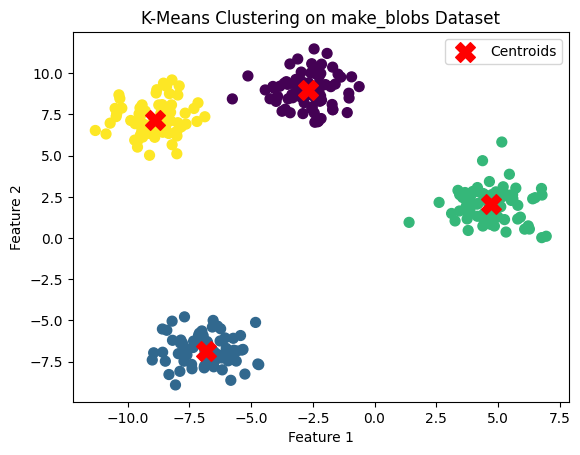

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering on make_blobs Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
wine = load_wine()
X = wine.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)
unique_clusters = set(clusters)
num_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)
print("Number of clusters found (excluding noise):", num_clusters)

Number of clusters found (excluding noise): 0


Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.

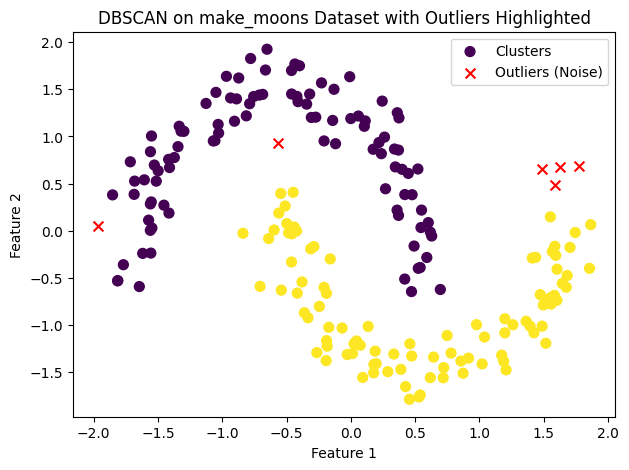

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)
noise_points = clusters == -1
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[~noise_points, 0], X_scaled[~noise_points, 1],
            c=clusters[~noise_points], cmap='viridis', s=50, label="Clusters")
plt.scatter(X_scaled[noise_points, 0], X_scaled[noise_points, 1],
            c='red', s=50, marker='x', label="Outliers (Noise)")
plt.title("DBSCAN on make_moons Dataset with Outliers Highlighted")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.

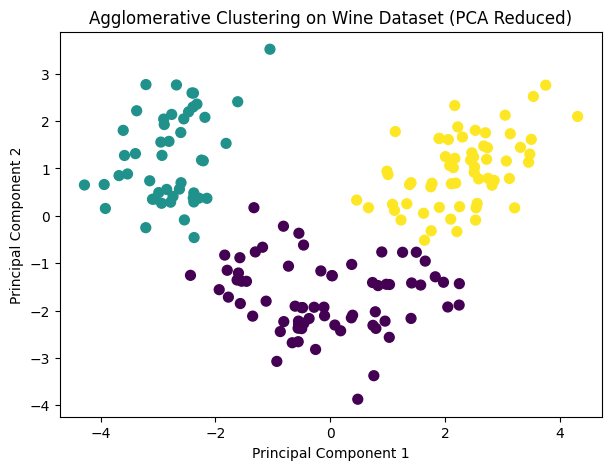

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
wine = load_wine()
X = wine.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
agg_cluster = AgglomerativeClustering(n_clusters=3)
cluster_labels = agg_cluster.fit_predict(X_pca)
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering on Wine Dataset (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?


1. Clustering Algorithm Selection

K-Means Clustering

Fast and scalable for large e-commerce datasets.

Easy to interpret customer segments.

Works well when clusters are fairly distinct.

2. Data Preprocessing

Missing Values

Numerical → fill with mean/median.

Categorical → fill with most frequent value.

Encoding

Convert categorical demographics using One-Hot Encoding.

Scaling

Apply StandardScaler because clustering uses distance measures.

Choosing the Number of Clusters

Elbow Method → find point of diminishing WCSS decrease.

Silhouette Score → higher score means better separation.

Dendrogram → visual cluster split inspection.

Marketing Team Benefits

Identify high-value loyal customers → reward programs.

Identify price-sensitive customers → discount campaigns.

Identify new customers → onboarding offers.

Identify inactive customers → re-engagement emails.

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
data = {
    'Age': [23,25,31,35,40,29,33,36,50,48],
    'Annual_Income': [15,16,18,20,22,19,21,23,30,28],
    'Spending_Score': [39,81,6,77,40,76,6,94,3,72]
}

df = pd.DataFrame(data)
df.fillna(df.mean(), inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = cluster_labels
score = silhouette_score(X_scaled, cluster_labels)
print("Clustered Customer Data:\n")
print(df)
print("\nSilhouette Score:", round(score, 3))


Clustered Customer Data:

   Age  Annual_Income  Spending_Score  Cluster
0   23             15              39        2
1   25             16              81        2
2   31             18               6        2
3   35             20              77        0
4   40             22              40        0
5   29             19              76        0
6   33             21               6        2
7   36             23              94        0
8   50             30               3        1
9   48             28              72        1

Silhouette Score: 0.245
